In [5]:
#common imports
import numpy as np
import cv2 as cv
import pandas as pd
import matplotlib.pyplot as plt
from class_and_functions_for_combinations import *


def save_fig(name, fig):
    fig.savefig(f'thesis_figures/{name}.eps', format='eps', dpi=2000, bbox_inches='tight')

#define standard matplotlib colors
C1 = (155/255, 0/255 ,20/255)
C2 = (4/255, 100/255, 218/255)

assert False, 'Do not do a run all, it is designed to be run cell by cell, and will fail if you do a run all'

AssertionError: Do not do a run all, it is designed to be run cell by cell, and will fail if you do a run all

MSE:  10.816352
MAE:  1.8760468


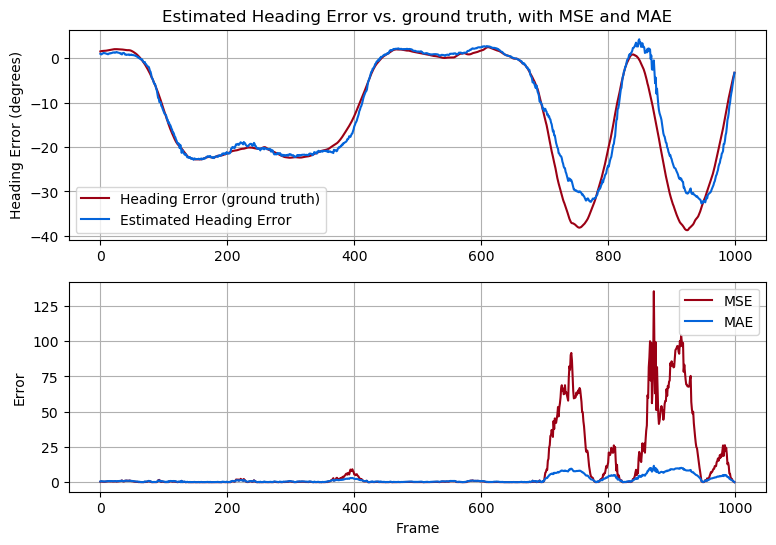

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [7]:
# PERFORMANCE METRCIS: MSE
ds_name = 'saved_tests/cw0.npz'
ds = np.load(ds_name)
imgs, locs = ds['imgs'], ds['locs']
path = np.load('sparcs/sparcs_path_precise.npy').T
onnx_model_path = 'Simulator/models/lane_keeper_ahead.onnx'
onnx_model = cv.dnn.readNetFromONNX(onnx_model_path)
dist_ahead = 0.8

hes, est_hes, MSEs, MAEs = [], [], [], []
for i in range(1000):
    img = imgs[i]
    x,y,yaw = locs[i]

    he, _, _ = get_heading_error(x, y, yaw, path, dist_ahead)
    est_he = get_est_heading_error(img, onnx_model)

    #convert to degrees
    he = np.rad2deg(he)
    est_he = np.rad2deg(est_he)

    mse = (he - est_he)**2
    mae = np.abs(he - est_he)

    hes.append(he)
    est_hes.append(est_he)
    MSEs.append(mse)
    MAEs.append(mae)

print('MSE: ', np.mean(MSEs))
print('MAE: ', np.mean(MAEs))

hes, est_hes, MSEs, MAEs = np.array(hes), np.array(est_hes), np.array(MSEs), np.array(MAEs)

#plot
fig, ax = plt.subplots(2,1, figsize=(9,6))
ax[0].plot(hes, label='Heading Error (ground truth)', color=C1)
ax[0].plot(est_hes, label='Estimated Heading Error', color=C2)
ax[0].set_ylabel('Heading Error (degrees)')
ax[0].legend()
ax[0].grid(True)
ax[0].set_axisbelow(True)
#title
ax[0].set_title('Estimated Heading Error vs. ground truth, with MSE and MAE')

ax[1].plot(MSEs, label='MSE', color=C1)
ax[1].plot(MAEs, label='MAE', color=C2)
ax[1].set_xlabel('Frame')
ax[1].set_ylabel('Error')
ax[1].legend()
ax[1].grid(True)
ax[1].set_axisbelow(True)
#y axis in log scale
# ax[1].set_yscale('log')

plt.show()

#save figure in vector format
save_fig('performance_metrics_example', fig)

